In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import cv2
import glob

In [2]:
labels = []
data = []
for i,j in enumerate(['without_mask','with_mask']):
    for rasm in glob.glob('dataset/' + j + "/*"):
        labels.append(i)
        rasm = cv2.imread(rasm)
        rasm = cv2.resize(rasm,(96,96))
        data.append(rasm)

data = np.array(data, dtype=np.uint8)
labels = np.array(labels, dtype=np.uint8)

In [3]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [5]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=7)

Epoch 1/7
95/95 [==============================] - 11s 74ms/step - loss: 1.1716 - accuracy: 0.8589
Epoch 2/7
95/95 [==============================] - 7s 69ms/step - loss: 0.1496 - accuracy: 0.9466
Epoch 3/7
95/95 [==============================] - 7s 69ms/step - loss: 0.1240 - accuracy: 0.9542
Epoch 4/7
95/95 [==============================] - 7s 71ms/step - loss: 0.0906 - accuracy: 0.9654
Epoch 5/7
95/95 [==============================] - 7s 70ms/step - loss: 0.0608 - accuracy: 0.9766
Epoch 6/7
95/95 [==============================] - 7s 71ms/step - loss: 0.0503 - accuracy: 0.9825
Epoch 7/7
95/95 [==============================] - 7s 72ms/step - loss: 0.0459 - accuracy: 0.9848


In [6]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 1s 43ms/step - loss: 0.1189 - accuracy: 0.9605


[0.11887463927268982, 0.9604743123054504]

In [7]:
model.save('mask.h5')

In [8]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=7,
    validation_data=(X_test, y_test),
)

Epoch 1/7
48/48 [==============================] - 8s 149ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.1013 - val_accuracy: 0.9723
Epoch 2/7
48/48 [==============================] - 7s 140ms/step - loss: 0.0067 - accuracy: 0.9970 - val_loss: 0.0983 - val_accuracy: 0.9736
Epoch 3/7
48/48 [==============================] - 7s 137ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0756 - val_accuracy: 0.9816
Epoch 4/7
48/48 [==============================] - 7s 137ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0795 - val_accuracy: 0.9776
Epoch 5/7
48/48 [==============================] - 7s 138ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9776
Epoch 6/7
48/48 [==============================] - 7s 138ms/step - loss: 5.7933e-04 - accuracy: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9763
Epoch 7/7
48/48 [==============================] - 7s 137ms/step - loss: 3.7382e-04 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9763


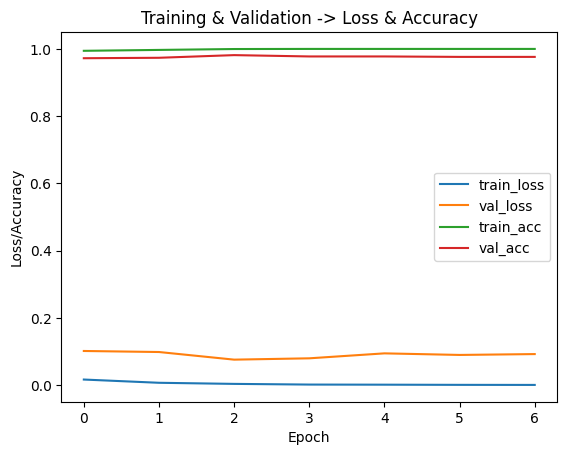

In [10]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")

plt.title("Training & Validation -> Loss & Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.savefig('plot.png')